In [1]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [2]:
## Import library

In [3]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g., pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
from sklearn import svm
from lightgbm import LGBMRegressor

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
file_path = '/content/drive/MyDrive/Data/Data_Train.xlsx'
file_path2 = '/content/drive/MyDrive/Data/Test_set.xlsx'

In [6]:
## Reading datasets

train_df = pd.read_excel(file_path)
test_df = pd.read_excel(file_path2)

In [7]:
## Reading datasets

train_df = pd.read_excel('Data_Train.xlsx')
test_df = pd.read_excel('Test_set.xlsx')

FileNotFoundError: ignored

In [7]:
## Append the dataset

big_df = train_df._append(test_df)

In [8]:
# Datatype details

big_df.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
dtype: object

In [9]:
## Creating a dataframe

big_df['Date'] = big_df['Date_of_Journey'].str.split('/').str[0]
big_df['Month'] = big_df['Date_of_Journey'].str.split('/').str[1]
big_df['Year'] = big_df['Date_of_Journey'].str.split('/').str[2]

In [10]:
## Assign the type of features

big_df['Date'] = big_df['Date'].astype(int)
big_df['Month'] = big_df['Month'].astype(int)
big_df['Year'] = big_df['Year'].astype(int)

In [11]:
## Droping unnessary colomn

big_df=big_df.drop(['Date_of_Journey'], axis=1)

In [12]:
## Cleaning Arrival Time features from unwanted infos

big_df['Arrival_Time'] = big_df['Arrival_Time'] .str.split(' ').str[0]

In [13]:
## Replacce missing values

big_df['Total_Stops']=big_df['Total_Stops'].fillna('1 stop')

In [14]:
## Converting non-stop to 0 stop

big_df['Total_Stops']=big_df['Total_Stops'].replace('non-stop','0 stop')

In [15]:
## Extract to stop number

big_df['Stop'] = big_df['Total_Stops'].str.split(' ').str[0]

In [16]:
## Convert this value to int

big_df['Stop'] = big_df['Stop'].astype(int)

In [17]:
## Drop unnessary colomn

big_df=big_df.drop(['Total_Stops'], axis=1)

In [18]:
## Prepare new colomns

big_df['Arrival_Hour'] = big_df['Arrival_Time'] .str.split(':').str[0]
big_df['Arrival_Minute'] = big_df['Arrival_Time'] .str.split(':').str[1]

big_df['Arrival_Hour'] = big_df['Arrival_Hour'].astype(int)
big_df['Arrival_Minute'] = big_df['Arrival_Minute'].astype(int)
big_df=big_df.drop(['Arrival_Time'], axis=1)

In [19]:
## Again

big_df['Dep_Hour'] = big_df['Dep_Time'] .str.split(':').str[0]
big_df['Dep_Minute'] = big_df['Dep_Time'] .str.split(':').str[1]
big_df['Dep_Hour'] = big_df['Dep_Hour'].astype(int)
big_df['Dep_Minute'] = big_df['Dep_Minute'].astype(int)
big_df=big_df.drop(['Dep_Time'], axis=1)

In [20]:
## Extract route info

big_df['Route_1'] = big_df['Route'] .str.split('→ ').str[0]
big_df['Route_2'] = big_df['Route'] .str.split('→ ').str[1]
big_df['Route_3'] = big_df['Route'] .str.split('→ ').str[2]
big_df['Route_4'] = big_df['Route'] .str.split('→ ').str[3]
big_df['Route_5'] = big_df['Route'] .str.split('→ ').str[4]

In [21]:
## Replacing nans with mean

big_df['Price'].fillna((big_df['Price'].mean()), inplace=True)

In [22]:
## Replace NaNs with None and improve data quality

big_df['Route_1'].fillna("None",inplace = True)
big_df['Route_2'].fillna("None",inplace = True)
big_df['Route_3'].fillna("None",inplace = True)
big_df['Route_4'].fillna("None",inplace = True)
big_df['Route_5'].fillna("None",inplace = True)

In [23]:
big_df.describe()

,Price,Date,Month,Year,Stop,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute
count,13354.000000,13354.000000,13354.000000,13354.0,13354.000000,13354.000000,13354.000000,13354.000000,13354.000000
mean,9087.064121,13.389846,4.710574,2019.0,0.826045,13.396061,24.664146,12.513254,24.507264
std,4124.447805,8.439060,1.165622,0.0,0.674608,6.896145,16.559723,5.736273,18.832385
min,1759.000000,1.000000,3.000000,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6135.250000,6.000000,3.000000,2019.0,0.000000,8.000000,10.000000,8.000000,5.000000
50%,9087.064121,12.000000,5.000000,2019.0,1.000000,14.000000,25.000000,11.000000,25.000000
75%,11087.000000,21.000000,6.000000,2019.0,1.000000,19.000000,35.000000,18.000000,40.000000
max,79512.000000,27.000000,6.000000,2019.0,4.000000,23.000000,55.000000,23.000000,55.000000


In [24]:
## Remove the colomns

big_df=big_df.drop(['Route'], axis=1)
big_df=big_df.drop(['Duration'], axis=1)

In [25]:
# Converting the Categorical into integer variable

from sklearn.preprocessing import LabelEncoder

lb_encode = LabelEncoder()
big_df["Additional_Info"] = lb_encode.fit_transform(big_df["Additional_Info"])
big_df["Airline"] = lb_encode.fit_transform(big_df["Airline"])
big_df["Destination"] = lb_encode.fit_transform(big_df["Destination"])
big_df["Source"] = lb_encode.fit_transform(big_df["Source"])
big_df['Route_1']= lb_encode.fit_transform(big_df["Route_1"])
big_df['Route_2']= lb_encode.fit_transform(big_df["Route_2"])
big_df['Route_3']= lb_encode.fit_transform(big_df["Route_3"])
big_df['Route_4']= lb_encode.fit_transform(big_df["Route_4"])
big_df['Route_5']= lb_encode.fit_transform(big_df["Route_5"])

In [26]:
# # Missing value validation

def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()

        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)

        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")

        # Return the dataframe with missing information
        return mis_val_table_ren_columns



In [27]:
missing_values_table(big_df)

Your selected dataframe has 18 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [28]:
# Split it into test and train

df_train = big_df[0:10683]
df_test = big_df[10683:]
df_test = df_test.drop(['Price'], axis =1)

In [29]:
X = df_train.drop(['Price'], axis=1)
y = df_train.Price

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [31]:
## MODEL BUILDING

from IPython.display import Image
from IPython.core.display import HTML
Image(url = "http://i.imgur.com/QBuDOjs.jpg")

In [32]:
## LINEAR REGRESSION

#Build our model method
lm = LinearRegression()

In [33]:
#Build our cross validation method

kfolds = KFold(n_splits=50,shuffle=True, random_state=100)

In [34]:
def cv_rmse(model):
    rmse = np.sqrt(-cross_val_score(model, X, y,
                                   scoring="neg_mean_squared_error",
                                   cv = kfolds))
    return(rmse)

In [35]:
benchmark_model = make_pipeline(RobustScaler(),
                                lm).fit(X=X_train, y=y_train)
cv_rmse(benchmark_model).mean()

3238.316987636253

In [36]:
## Ridge Regression

from sklearn.linear_model import RidgeCV

def ridge_selector(k):
    ridge_model = make_pipeline(RobustScaler(),
                                RidgeCV(alphas = [k],
                                        cv=kfolds)).fit(X_train, y_train)

    ridge_rmse = cv_rmse(ridge_model).mean()
    return(ridge_rmse)

In [37]:
r_alphas = [.0001, .0003, .0005, .0007, .0009,
          .01, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 20, 30, 50, 60, 70, 80]

ridge_scores = []
for alpha in r_alphas:
    score = ridge_selector(alpha)
    ridge_scores.append(score)

,RMSE
0.0001,3238.316986
0.0003,3238.316983
0.0005,3238.316980
0.0007,3238.316977
0.0009,3238.316974
0.0100,3238.316841
0.0500,3238.316253
0.1000,3238.315520
0.3000,3238.312603
1.0000,3238.302585


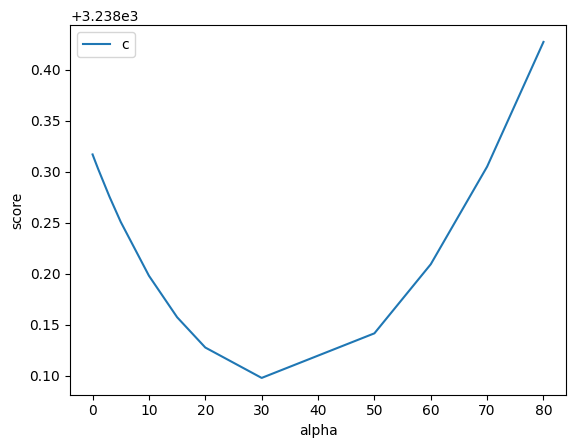

In [38]:
plt.plot(r_alphas, ridge_scores, label='Ridge')
plt.legend('center')
plt.xlabel('alpha')
plt.ylabel('score')

ridge_score_table = pd.DataFrame(ridge_scores, r_alphas, columns=['RMSE'])
ridge_score_table

In [39]:
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]

ridge_model2 = make_pipeline(RobustScaler(),
                            RidgeCV(alphas = alphas_alt,
                                    cv=kfolds)).fit(X_train, y_train)

cv_rmse(ridge_model2).mean()

3238.153926834791

In [40]:
## Lasso Regression

alphas = [0.00005, 0.0001, 0.0003, 0.0005, 0.0007,
          0.0009, 0.01]
alphas2 = [0.00005, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
           0.0006, 0.0007, 0.0008]


lasso_model2 = make_pipeline(RobustScaler(),
                             LassoCV(max_iter=10000000,
                                    alphas = alphas2,
                                    random_state = 42)).fit(X_train, y_train)

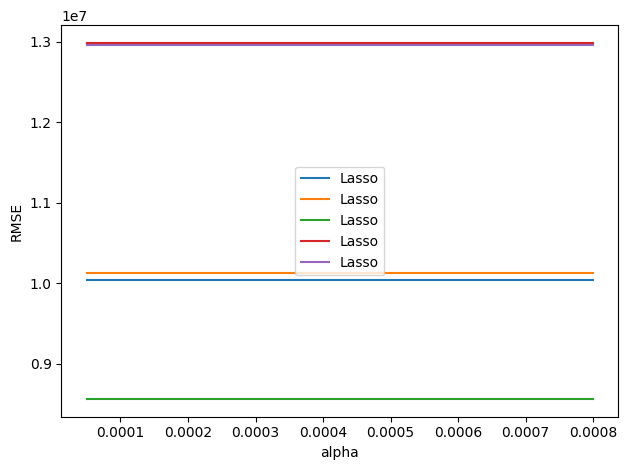

In [41]:
scores = lasso_model2.steps[1][1].mse_path_

plt.plot(alphas2, scores, label='Lasso')
plt.legend(loc='center')
plt.xlabel('alpha')
plt.ylabel('RMSE')
plt.tight_layout()
plt.show()

In [42]:
cv_rmse(lasso_model2).mean()

3238.3169506199984

In [43]:
## Elastic Net Regression

e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

elastic_cv = make_pipeline(RobustScaler(),
                           ElasticNetCV(max_iter=10000000, alphas=e_alphas,
                                        cv=kfolds, l1_ratio=e_l1ratio))

elastic_model3 = elastic_cv.fit(X_train, y_train)

In [44]:
cv_rmse(elastic_model3).mean()

3238.2960573475075

In [46]:
pip install xgboost

In [45]:
## XGBoost

from sklearn.model_selection import GridSearchCV
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4
get_ipython().run_line_magic('matplotlib', 'inline')
import xgboost as xgb
from xgboost import XGBRegressor

In [46]:
def modelfit(alg, dtrain, target, useTrainCV=True,
             cv_folds=5, early_stopping_rounds=50):

    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain.values,
                              label=y.values)

        print("\nGetting Cross-validation result..")
        cvresult = xgb.cv(xgb_param, xgtrain,
                          num_boost_round=alg.get_params()['n_estimators'],
                          nfold=cv_folds,metrics='rmse',
                          early_stopping_rounds=early_stopping_rounds,
                          verbose_eval = True)
        alg.set_params(n_estimators=cvresult.shape[0])

    #Fit the algorithm on the data
    print("\nFitting algorithm to data...")
    alg.fit(dtrain, target, eval_metric='rmse')

    #Predict training set:
    print("\nPredicting from training data...")
    dtrain_predictions = alg.predict(dtrain)

    #Print model report:
    print("\nModel Report")
    print("RMSE : %.4g" % np.sqrt(mean_squared_error(target.values,
                                             dtrain_predictions)))


In [48]:
xgb3 = XGBRegressor(learning_rate=0.1, n_estimators=200, max_depth=10,
                    min_child_weight=5, gamma=0, subsample=0.7, max_bin=20,
                    colsample_bytree=0.8, objective='reg:squarederror',  # Update here
                    nthread=4, scale_pos_weight=1, seed=27, reg_alpha=0.00006)

xgb_fit = xgb3.fit(X_train, y_train)


In [49]:
cv_rmse(xgb_fit).mean()

1297.6979798688478

In [49]:
import xgboost as xgb

# Assuming you have your features and target variable (X_train, y_train) defined
# Replace 'reg:linear' with 'reg:squarederror'
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Fit the model
xgb_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [52]:
## Support vector machine

from sklearn import svm
svr_opt = svm.SVR(C = 100000, gamma = 1e-08)

svr_fit = svr_opt.fit(X_train, y_train)

In [53]:
cv_rmse(svr_fit).mean()

4191.657759309572

In [50]:
## Light GBM

from lightgbm import LGBMRegressor

lgbm_model = LGBMRegressor(
    objective='regression',
    num_leaves=31,
    learning_rate=0.1,
    n_estimators=200,
    max_bin=100,
    bagging_fraction=0.8,
    bagging_freq=5,
    feature_fraction=0.8,
    feature_fraction_seed=9,
    bagging_seed=9,
    min_data_in_leaf=20,
    min_sum_hessian_in_leaf=11
)

lgbm_fit = lgbm_model.fit(X_train, y_train)


[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightG

In [51]:
cv_rmse(lgbm_fit).mean()

[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightG

1411.4194777333657

In [55]:
## STACKING

from mlxtend.regressor import StackingCVRegressor
from sklearn.pipeline import make_pipeline

#setup models
ridge = make_pipeline(RobustScaler(),
                      RidgeCV(alphas = alphas_alt, cv=kfolds))

lasso = make_pipeline(RobustScaler(),
                      LassoCV(max_iter=10000000, alphas = alphas2,
                              random_state = 42, cv=kfolds))

elasticnet = make_pipeline(RobustScaler(),
                           ElasticNetCV(max_iter=10000000, alphas=e_alphas,
                                        cv=kfolds, l1_ratio=e_l1ratio))

lightgbm = make_pipeline(RobustScaler(),
                        LGBMRegressor(objective='regression',num_leaves=31,
                              learning_rate=0.1, n_estimators=200,
                              max_bin = 100, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.8,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11))


xgboost = make_pipeline(RobustScaler(),
                        XGBRegressor(learning_rate =0.1, n_estimators=200, max_depth=10,
                     min_child_weight=5 ,gamma=0, subsample=0.7,
                     colsample_bytree=0.8,objective= 'reg:linear',
                     nthread=4,scale_pos_weight=1,seed=27, reg_alpha=0.00006))


#stack
stack_gen = StackingCVRegressor(regressors=(ridge, lasso, elasticnet,
                                            xgboost, lightgbm),
                               meta_regressor=xgboost,
                               use_features_in_secondary=True)



#prepare dataframes
stackX = np.array(X_train)
stacky = np.array(y_train)


In [56]:
stack_gen_model = stack_gen.fit(stackX, stacky)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [17:05:18] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [17:05:19] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [17:05:20] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [17:05:21] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:

[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] 

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [17:05:25] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [17:05:32] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] 

In [57]:
em_preds = elastic_model3.predict(X_test)
lasso_preds = lasso_model2.predict(X_test)
ridge_preds = ridge_model2.predict(X_test)
stack_gen_preds = stack_gen_model.predict(X_test)
xgb_preds = xgb_fit.predict(X_test)
#svr_preds = svr_fit.predict(X_test)
lgbm_preds = lgbm_fit.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RobustScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RobustScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RobustScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RobustScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RobustScaler was fitted without feature names
  warnings.warn(


[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM

In [58]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = np.sqrt(mean_squared_error(y_test, stack_gen_preds))
print("RMSE: %f" % (rmse))

RMSE: 1448.526691


In [60]:
df_test_xgb = df_test[['Additional_Info', 'Airline', 'Destination', 'Source', 'Date', 'Month',
       'Year', 'Stop', 'Arrival_Hour', 'Arrival_Minute', 'Dep_Hour',
       'Dep_Minute', 'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5']]
preds_1 = stack_gen_model.predict(df_test_xgb)
df_test_xgb['Price'] = preds_1
df_test_xgb.to_csv('/content/drive/MyDrive/Data/flight_price_5.csv',index=False)

[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RobustScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RobustScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RobustScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RobustScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RobustScaler was fitted without feature names
  warnings.warn(
<ipython-input-60-4a4d31ca200b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

In [62]:
# Check the feature names used during training
trained_model_feature_names = xgb_fit.get_booster().feature_names
print("Trained Model Feature Names:", trained_model_feature_names)


Trained Model Feature Names: ['Airline', 'Source', 'Destination', 'Additional_Info', 'Date', 'Month', 'Year', 'Stop', 'Arrival_Hour', 'Arrival_Minute', 'Dep_Hour', 'Dep_Minute', 'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5']


In [63]:
# Check the columns in your DataFrame
df_columns = df_test_xgb.columns
print("DataFrame Columns:", df_columns)


DataFrame Columns: Index(['Additional_Info', 'Airline', 'Destination', 'Source', 'Date', 'Month',
       'Year', 'Stop', 'Arrival_Hour', 'Arrival_Minute', 'Dep_Hour',
       'Dep_Minute', 'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5'],
      dtype='object')


In [64]:
# Reorder or rename columns in your DataFrame
df_test_xgb = df_test_xgb[trained_model_feature_names]


In [65]:
# Make predictions using the corrected DataFrame
preds_1 = xgb_fit.predict(df_test_xgb)

# Add 'Price' column to the DataFrame
df_test_xgb['Price'] = preds_1

# Save the DataFrame to a CSV file
output_path = '/content/drive/MyDrive/Data/flight_price_10.csv'
df_test_xgb.to_csv(output_path, index=False)


<ipython-input-65-1154de1379be>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_xgb['Price'] = preds_1
